In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key
import time

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
coordinates = list(lat_lngs)
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
#If the city is unique, then we will add it to the cities list.    
    if city not in cities:
            cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

610

In [4]:
#Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.

#We will need to do the following:

#Import our dependencies and initialize counters and an empty list that will hold the weather data.

#Loop through the cities list.

#Group the cities in sets of 50 to log the process as we find the weather data for each city.

#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.

#Build the city_url or endpoint for each city.

#Log the URL and the record and set numbers.

#Make an API request for each city.

#Parse the JSON weather data for the following:

#City, country, and date
##Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed

#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | port-cartier
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | hammerfest
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | guiyang
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | lazaro cardenas
Processing Record 13 of Set 1 | umm jarr
City not found. Skipping...
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | henties bay
Processing Record 19 of Set 1 | evensk
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | tiksi
Processing R

Processing Record 41 of Set 4 | luanda
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | gondanglegi
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | ayan
Processing Record 46 of Set 4 | los andes
Processing Record 47 of Set 4 | boyolangu
Processing Record 48 of Set 4 | randazzo
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | kachikau
City not found. Skipping...
Processing Record 1 of Set 5 | keningau
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | port alfred
Processing Record 4 of Set 5 | alugan
Processing Record 5 of Set 5 | akyab
Processing Record 6 of Set 5 | baiyin
Processing Record 7 of Set 5 | karachi
Processing Record 8 of Set 5 | rio gallegos
Processing Record 9 of Set 5 | tabou
Processing Record 10 of Set 5 | valparaiso
Processing Record 11 of Set 5 | labuhan
Processing Record 12 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 5 | mattru
Processi

Processing Record 30 of Set 8 | stornoway
Processing Record 31 of Set 8 | vygonichi
Processing Record 32 of Set 8 | portland
Processing Record 33 of Set 8 | lasa
Processing Record 34 of Set 8 | banda aceh
Processing Record 35 of Set 8 | narsaq
Processing Record 36 of Set 8 | ribeira grande
Processing Record 37 of Set 8 | along
Processing Record 38 of Set 8 | rio grande
Processing Record 39 of Set 8 | beloha
Processing Record 40 of Set 8 | mandera
Processing Record 41 of Set 8 | bondo
Processing Record 42 of Set 8 | kuche
City not found. Skipping...
Processing Record 43 of Set 8 | havelock
Processing Record 44 of Set 8 | vila velha
Processing Record 45 of Set 8 | roslyakovo
Processing Record 46 of Set 8 | salihorsk
Processing Record 47 of Set 8 | mantua
Processing Record 48 of Set 8 | ankpa
Processing Record 49 of Set 8 | sungaipenuh
Processing Record 50 of Set 8 | madang
Processing Record 1 of Set 9 | souillac
Processing Record 2 of Set 9 | tawau
Processing Record 3 of Set 9 | shumskiy

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,51.01,93,72,3.00,NZ,2020-10-29 15:29:08
1,Port-Cartier,50.03,-66.87,35.01,74,40,11.41,CA,2020-10-29 15:24:56
2,Rikitea,-23.12,-134.97,74.35,72,100,8.52,PF,2020-10-29 15:29:08
3,Bengkulu,-3.80,102.27,77.32,86,100,3.89,ID,2020-10-29 15:29:08
4,Hammerfest,70.66,23.68,33.80,94,75,16.11,NO,2020-10-29 15:29:08
5,Hobart,-42.88,147.33,53.60,76,90,2.95,AU,2020-10-29 15:25:42
6,Butaritari,3.07,172.79,81.46,77,70,10.76,KI,2020-10-29 15:29:09
7,Sao Joao Da Barra,-21.64,-41.05,91.40,52,0,12.28,BR,2020-10-29 15:29:09
8,Atuona,-9.80,-139.03,77.31,70,3,18.25,PF,2020-10-29 15:29:09
9,Guiyang,26.58,106.72,55.40,93,90,2.24,CN,2020-10-29 15:29:09


In [8]:
city_data_df=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2020-10-29 15:29:08,-46.60,168.33,51.01,93,72,3.00
1,Port-Cartier,CA,2020-10-29 15:24:56,50.03,-66.87,35.01,74,40,11.41
2,Rikitea,PF,2020-10-29 15:29:08,-23.12,-134.97,74.35,72,100,8.52
3,Bengkulu,ID,2020-10-29 15:29:08,-3.80,102.27,77.32,86,100,3.89
4,Hammerfest,NO,2020-10-29 15:29:08,70.66,23.68,33.80,94,75,16.11
...,...,...,...,...,...,...,...,...,...
567,Srednekolymsk,RU,2020-10-29 15:31:39,67.45,153.68,3.25,94,100,1.01
568,Nelson Bay,AU,2020-10-29 15:31:39,-32.72,152.15,55.00,100,0,5.82
569,Port Shepstone,ZA,2020-10-29 15:31:39,-30.74,30.45,69.31,88,100,18.95
570,Arona,ES,2020-10-29 15:31:40,28.10,-16.68,75.99,53,40,14.99


In [9]:
#Create the output file (CSV).
output_data_file= "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# 6.3.1 Plot latitude vs Temp.
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
today=time.strftime("%x")

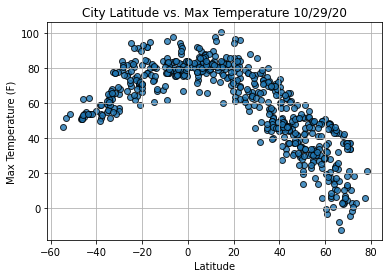

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

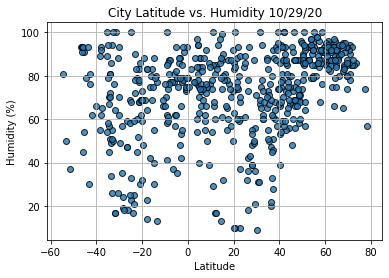

In [13]:
##6.3.2 Plot Latitude vs Humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

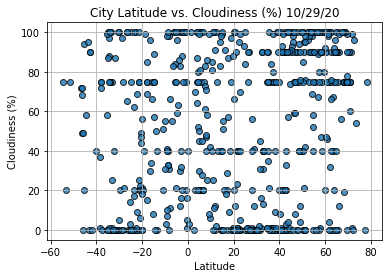

In [14]:
# 6.3.3 Plot Latitude vs Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

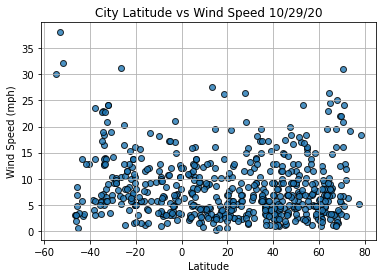

In [15]:
#6.3.4 Plot Latitude vs. Wind Speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
index13 =city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2020-10-29 15:28:24
Lat                         19.73
Lng                       -155.09
Max Temp                       73
Humidity                       73
Cloudiness                      1
Wind Speed                   6.93
Name: 13, dtype: object

In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Port-Cartier,CA,2020-10-29 15:24:56,50.03,-66.87,35.01,74,40,11.41
4,Hammerfest,NO,2020-10-29 15:29:08,70.66,23.68,33.80,94,75,16.11
6,Butaritari,KI,2020-10-29 15:29:09,3.07,172.79,81.46,77,70,10.76
9,Guiyang,CN,2020-10-29 15:29:09,26.58,106.72,55.40,93,90,2.24
11,Lazaro Cardenas,MX,2020-10-29 15:29:10,17.96,-102.20,80.58,76,9,3.31


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

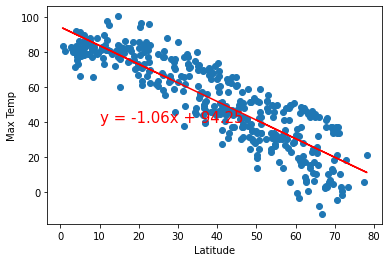

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

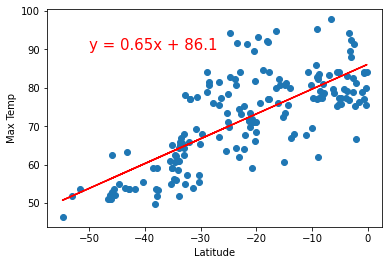

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

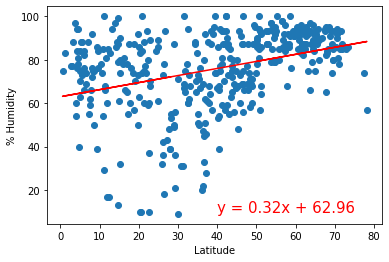

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

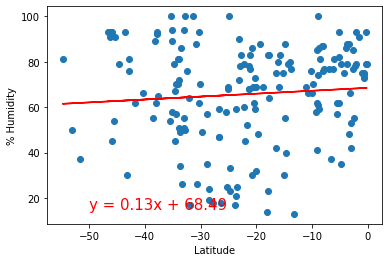

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

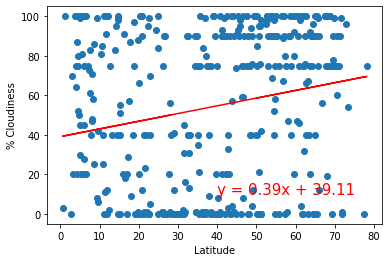

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

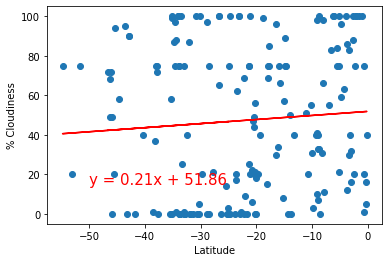

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))

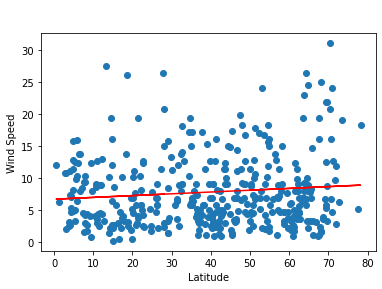

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

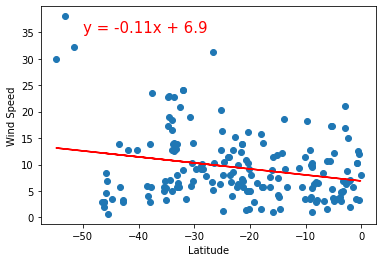

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))